<a href="https://colab.research.google.com/github/greyhound101/internship/blob/master/resnet_final_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
drive.mount("/content/gdrive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
Mounted at /content/gdrive


In [2]:
import scipy.io
import numpy as np

from tqdm import tqdm
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
import numpy as np
from tensorflow.keras.optimizers import *
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import LearningRateScheduler,EarlyStopping,ReduceLROnPlateau
from keras.utils import to_categorical
import gc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
f = np.load('/content/gdrive/My Drive/check.npy',allow_pickle=True)
f=f.item()

In [0]:
def convert_1(arr):
  arr=np.where(arr==1,0,arr)
  arr=np.where(arr==2,1,arr)
  arr=np.where(arr==3,2,arr)
  return arr
def get_trn_tst(tst_fold):
  idx=np.asarray(f['fold'])
  y=convert_1(np.asarray(f['label']))
  img=np.asarray(f['image'])
  trn_y=np.asarray(y[(idx!=tst_fold)])
  trn_img=np.asarray(img[(idx!=tst_fold)])
  tst_y=np.asarray(y[(idx==tst_fold)])
  tst_img=img[idx==tst_fold]
  trn_img=np.repeat(trn_img.reshape((trn_img.shape[0],224,224,1)),3,axis=3)
  tst_img=np.repeat(tst_img.reshape((tst_img.shape[0],224,224,1)),3,axis=3)
  return (trn_img.copy(),trn_y.copy()),(tst_img.copy(),tst_y.copy())

def change(model,c):
  for i in model.layers:
    if ('conv'+str(c) in i.name) :
      i.trainable=True
  return model


  

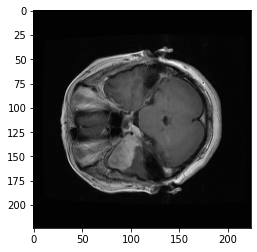

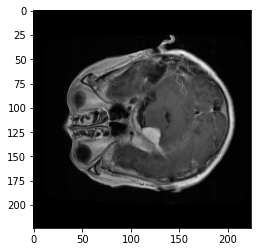

Epoch 1/50
79/79 [==============================] - 4s 56ms/step - loss: 3.4897 - accuracy: 0.4810 - lr: 0.1000
Epoch 2/50
79/79 [==============================] - 4s 56ms/step - loss: 1.0186 - accuracy: 0.6031 - lr: 0.0980
Epoch 3/50
79/79 [==============================] - 4s 56ms/step - loss: 1.1702 - accuracy: 0.6451 - lr: 0.0960
Epoch 4/50
79/79 [==============================] - 4s 56ms/step - loss: 0.7224 - accuracy: 0.7201 - lr: 0.0941
Epoch 5/50
79/79 [==============================] - 4s 56ms/step - loss: 0.9428 - accuracy: 0.6788 - lr: 0.0921
Epoch 6/50
79/79 [==============================] - 4s 56ms/step - loss: 0.9654 - accuracy: 0.6780 - lr: 0.0901
Epoch 7/50
79/79 [==============================] - 4s 56ms/step - loss: 0.7280 - accuracy: 0.7121 - lr: 0.0881
Epoch 8/50
79/79 [==============================] - 4s 56ms/step - loss: 0.7620 - accuracy: 0.7216 - lr: 0.0861
Epoch 9/50
79/79 [==============================] - 4s 56ms/step - loss: 0.8959 - accuracy: 0.7066 - lr:

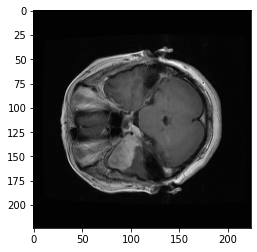

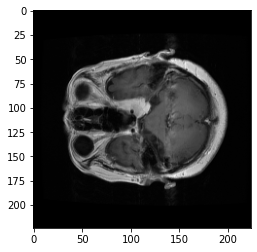

Epoch 1/50
75/75 [==============================] - 4s 56ms/step - loss: 5.0838 - accuracy: 0.4692 - lr: 0.1000
Epoch 2/50
75/75 [==============================] - 4s 56ms/step - loss: 1.2952 - accuracy: 0.6113 - lr: 0.0980
Epoch 3/50
75/75 [==============================] - 4s 56ms/step - loss: 1.0723 - accuracy: 0.6637 - lr: 0.0960
Epoch 4/50
75/75 [==============================] - 4s 56ms/step - loss: 1.2023 - accuracy: 0.6604 - lr: 0.0941
Epoch 5/50
75/75 [==============================] - 4s 56ms/step - loss: 0.8252 - accuracy: 0.7153 - lr: 0.0921
Epoch 6/50
75/75 [==============================] - 4s 56ms/step - loss: 1.1204 - accuracy: 0.6767 - lr: 0.0901
Epoch 7/50
75/75 [==============================] - 4s 56ms/step - loss: 0.6341 - accuracy: 0.7572 - lr: 0.0881
Epoch 8/50
75/75 [==============================] - 4s 56ms/step - loss: 0.7312 - accuracy: 0.7191 - lr: 0.0861
Epoch 9/50
75/75 [==============================] - 4s 56ms/step - loss: 0.8206 - accuracy: 0.7069 - lr:

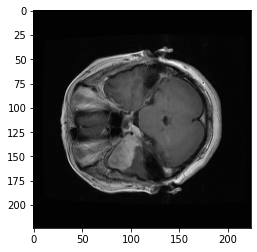

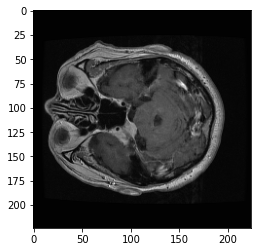

Epoch 1/50
78/78 [==============================] - 5s 58ms/step - loss: 4.5130 - accuracy: 0.4679 - lr: 0.1000
Epoch 2/50
78/78 [==============================] - 4s 58ms/step - loss: 1.1280 - accuracy: 0.6268 - lr: 0.0980
Epoch 3/50
78/78 [==============================] - 4s 57ms/step - loss: 0.7990 - accuracy: 0.6914 - lr: 0.0960
Epoch 4/50
78/78 [==============================] - 4s 57ms/step - loss: 1.4645 - accuracy: 0.6096 - lr: 0.0941
Epoch 5/50
78/78 [==============================] - 4s 57ms/step - loss: 0.8429 - accuracy: 0.6982 - lr: 0.0921
Epoch 6/50
78/78 [==============================] - 4s 57ms/step - loss: 0.6284 - accuracy: 0.7432 - lr: 0.0901
Epoch 7/50
78/78 [==============================] - 4s 57ms/step - loss: 0.7425 - accuracy: 0.7131 - lr: 0.0881
Epoch 8/50
78/78 [==============================] - 4s 57ms/step - loss: 0.9836 - accuracy: 0.7159 - lr: 0.0861
Epoch 9/50
78/78 [==============================] - 4s 57ms/step - loss: 1.1772 - accuracy: 0.6573 - lr:

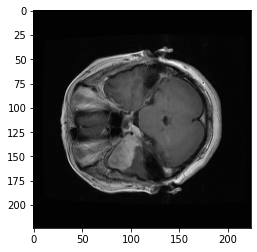

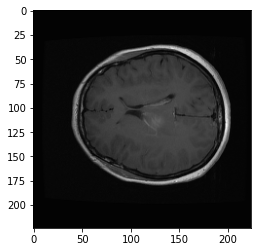

Epoch 1/50
77/77 [==============================] - 4s 58ms/step - loss: 4.4433 - accuracy: 0.4655 - lr: 0.1000
Epoch 2/50
77/77 [==============================] - 4s 56ms/step - loss: 1.2540 - accuracy: 0.5821 - lr: 0.0980
Epoch 3/50
77/77 [==============================] - 4s 56ms/step - loss: 1.0154 - accuracy: 0.6433 - lr: 0.0960
Epoch 4/50
77/77 [==============================] - 4s 56ms/step - loss: 1.1144 - accuracy: 0.6461 - lr: 0.0941
Epoch 5/50
77/77 [==============================] - 4s 56ms/step - loss: 2.0690 - accuracy: 0.6314 - lr: 0.0921
Epoch 6/50
77/77 [==============================] - 4s 56ms/step - loss: 1.2760 - accuracy: 0.6687 - lr: 0.0901
Epoch 7/50
77/77 [==============================] - 4s 56ms/step - loss: 0.7520 - accuracy: 0.7126 - lr: 0.0881
Epoch 8/50
77/77 [==============================] - 4s 56ms/step - loss: 0.7282 - accuracy: 0.7262 - lr: 0.0861
Epoch 9/50
77/77 [==============================] - 4s 56ms/step - loss: 0.8258 - accuracy: 0.7131 - lr:

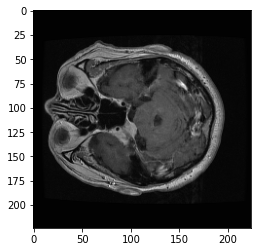

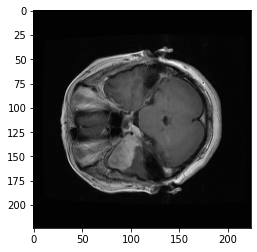

Epoch 1/50
76/76 [==============================] - 4s 58ms/step - loss: 4.3038 - accuracy: 0.5180 - lr: 0.1000
Epoch 2/50
76/76 [==============================] - 4s 56ms/step - loss: 0.9090 - accuracy: 0.6427 - lr: 0.0980
Epoch 3/50
76/76 [==============================] - 4s 56ms/step - loss: 1.4799 - accuracy: 0.5927 - lr: 0.0960
Epoch 4/50
76/76 [==============================] - 4s 56ms/step - loss: 0.8828 - accuracy: 0.7043 - lr: 0.0941
Epoch 5/50
76/76 [==============================] - 4s 56ms/step - loss: 0.8930 - accuracy: 0.6910 - lr: 0.0921
Epoch 6/50
76/76 [==============================] - 4s 56ms/step - loss: 0.8670 - accuracy: 0.7005 - lr: 0.0901
Epoch 7/50
76/76 [==============================] - 4s 56ms/step - loss: 0.9021 - accuracy: 0.6993 - lr: 0.0881
Epoch 8/50
76/76 [==============================] - 4s 56ms/step - loss: 0.6945 - accuracy: 0.7406 - lr: 0.0861
Epoch 9/50
76/76 [==============================] - 4s 56ms/step - loss: 0.7801 - accuracy: 0.7204 - lr:

In [7]:
ep=50
history=[]
predictions=[]
answers=[]
final_result=[]
for index in range(1,6):
  gc.collect()
  #loading train and test folds and showing image

  trn,tst=get_trn_tst(index)
  plt.imshow(trn[0][0])
  plt.show()
  plt.imshow(tst[0][0])
  plt.show()

  #loading model
  mod=ResNet50(include_top=False, pooling='avg', weights='imagenet')
  out_1=mod.layers[-1].output
  out=Dense(3,activation='softmax')(out_1)
  model=Model(inputs=mod.input,outputs=out)
  #training last layer
  
  def cng(idx):
    return 0.1-(0.1-0.001)*idx/50
  lrs=LearningRateScheduler(cng)
  esr=EarlyStopping(patience=3,min_delta=0.1,restore_best_weights=True)
  for i in range(len(model.layers)):
    model.layers[i].trainable = False
  model.layers[-1].trainable=True
  model.compile(optimizer='adam', 
                     loss='categorical_crossentropy', 
                     metrics=['accuracy'])
  hist=model.fit(trn[0],to_categorical(trn[1]),batch_size=32,epochs=ep,callbacks=[lrs])
  history.append(hist.history)
  x_trn=model.predict(trn[0])
  x_tst=model.predict(tst[0])
  predictions.append(x_tst)
  answers.append(tst[1])
  result=accuracy_score(tst[1],np.argmax(x_tst,1))
  final_result.append(result)

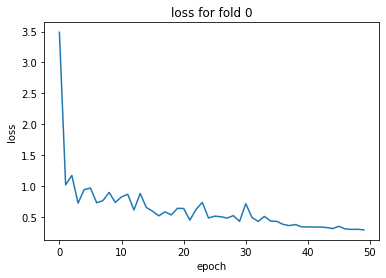

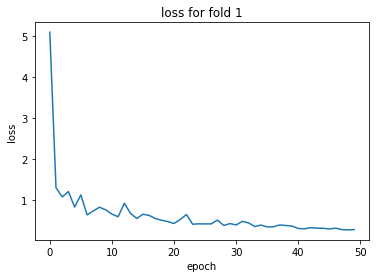

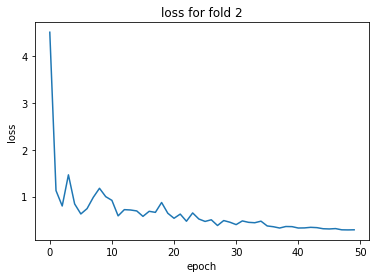

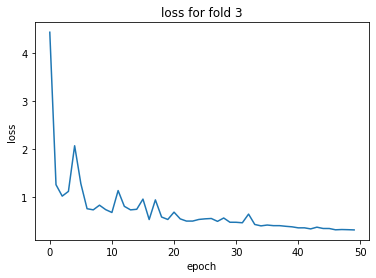

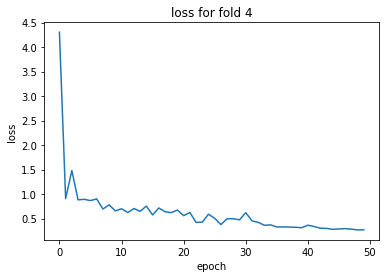

In [8]:
from matplotlib import pyplot as plt
for i in range(5):
    plt.plot(history[i]['loss'])
    plt.title('loss for fold '+str(i))
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

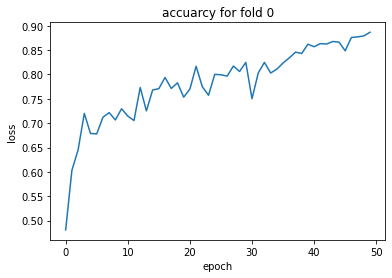

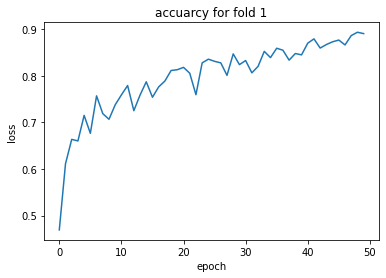

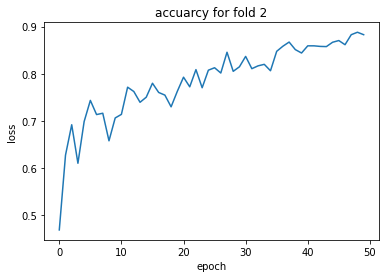

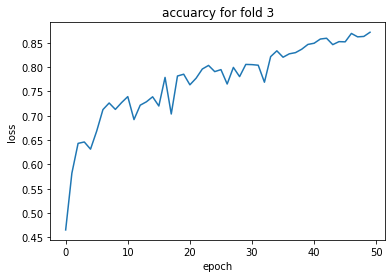

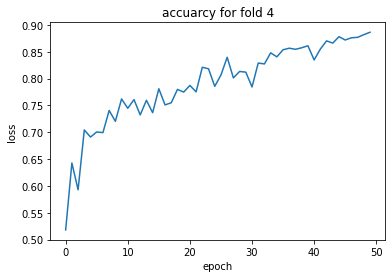

In [9]:
for i in range(5):
    plt.plot(history[i]['accuracy'])
    plt.title('accuarcy for fold '+str(i))
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

In [10]:
np.mean(final_result)

0.7852961074193667

In [11]:
from sklearn.metrics import confusion_matrix
for i in range(5):
  cnf=confusion_matrix(answers[i],np.argmax(predictions[i],1))
  print()
  print(cnf)


[[ 74  38   0]
 [ 30 215   0]
 [ 22  13 150]]

[[105  34  28]
 [ 84 234  20]
 [  9   5 160]]

[[ 58  74   7]
 [ 25 198   8]
 [  0   7 195]]

[[ 64  53   7]
 [ 22 294   9]
 [  7  11 161]]

[[ 63  72  31]
 [ 29 243  15]
 [  0   3 187]]
